# Problem 6

Necessary packages

In [23]:
import numpy as np
import matplotlib.pyplot as plt

Make the formula for self mutual inductance:

In [19]:
def selfInduct(r: float, l: float) -> float:
    # Constant for mu
    mu = (4 * np.pi) * (10 ** -7)
    
    # The actual formula
    lSelf = 0.0
    
    if (l > r):
        # Convert from mm to cm
        r * 1e-1
        l * 1e-1
        
        lSelf = (.002 * l) * (np.log((2 * l) / r) - (3 / 4)) # returns uH/cm
        lSelf *= 100 # puts in back in nH/mm
    else:
        print("warning")
    
    return lSelf

def mutualInduct(s: float, l: float) -> float:
    # Constant for mu
    mu = (4 * np.pi) * (10 ** -7)
    
    mSelf = 0.0
 
    # Convert from mm to cm
    s * 1e-1
    l * 1e-1
        
    mSelf = (.002 * l) * (np.log((2 * l) / s) - 1) # returns uH/cm
    mSelf *= 100 # puts in back in nH/mm

        
    return mSelf
        
def totalInduct(s: float, l: float, r: float):
    totalWMut = 0.0
    totalWOMut = 0.0
    
    totalWMut = (2 * (selfInduct(r, l))) - (2 * mutualInduct(s, l))
    totalWOMut = (2 * (selfInduct(r, l)))
    
    return totalWMut, totalWOMut

Create an array of spacings

In [20]:
# Arranging an array from 1mm to 10mm (.001m to .01m)
spacing = np.linspace(1, 10, 15) # This is in mm

print(spacing)

[ 1.          1.64285714  2.28571429  2.92857143  3.57142857  4.21428571
  4.85714286  5.5         6.14285714  6.78571429  7.42857143  8.07142857
  8.71428571  9.35714286 10.        ]


Calculate the inductances

In [21]:
totalWMuts = []
totalWOMuts = []

len = 10 # this in in mm
# diam is 5 mils (0.127 mm), so rad is 0.0635 mm
rad = 0.0635

for s in spacing:
    x1, x2 = totalInduct(s, len, rad)
    totalWMuts.append(x1)
    totalWOMuts.append(x2)


Plot

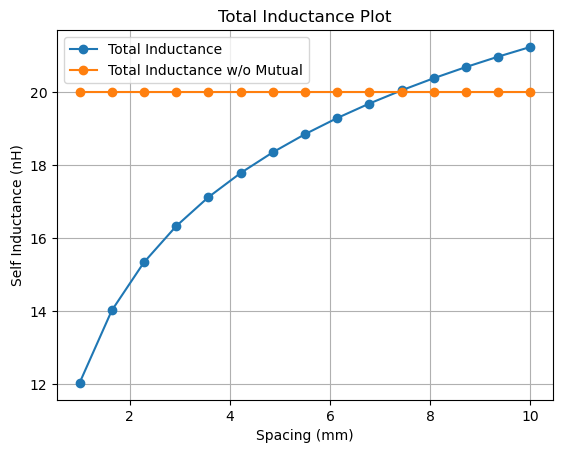

In [22]:
fig, ax = plt.subplots()

ax.plot(spacing, totalWMuts, marker='o', linestyle='-', label='Total Inductance')
ax.plot(spacing, totalWOMuts, marker='o', linestyle='-', label='Total Inductance w/o Mutual')

ax.set(xlabel='Spacing (mm)', ylabel='Self Inductance (nH)',
       title="Total Inductance Plot")
ax.grid()
ax.legend()

Since the inductance remains constant no matter the spacing, the line without mutal inductance 
barely changes which shows the amount of influence it has on the total inductance.